Используя базу данных автомобилей, создайте сеть с точностью распознавания не ниже 93% на проверочной выборке.

Для решения задачи вы можете использовать любой подход:
- модель без аугментации данных
- аугментация данных с помощью ImageDataGenerator
- аугментация данных с помощью самописного генератора изображений
- использовать готовую архитектуру из набора `tf.keras.applications` (Обратите внимание: на занятии мы не рассматривали данный модуль фреймворка Керас. Ваша задача: попробовать самостоятельно разобраться в приципах его работы. В разборе домашнего задания вы получите ссылку на ноутбук Базы Знаний УИИ, где подробно раскрывается вопрос использования готовых архитектур)

Found 2745 images belonging to 3 classes.
Found 341 images belonging to 3 classes.
Found 341 images belonging to 3 classes.
Train class distribution: [872 929 944]
Validation class distribution: [108 116 117]
Test class distribution: [108 116 117]


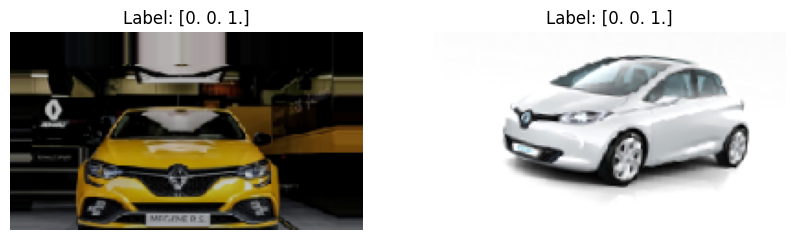

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 3, 6, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,288,579 (77.39 MB)

 Trainable params: 9,703,427 (37.02 MB)

 Non-trainable params: 10,585,152 (40.38 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.3419 - loss: 1.2744 - val_accuracy: 0.5191 - val_loss: 1.0680
Epoch 2/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 45s 533ms/step - accuracy: 0.3810 - loss: 1.0814 - val_accuracy: 0.5953 - val_loss: 0.9554
Epoch 3/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 40s 510ms/step - accuracy: 0.5124 - loss: 0.9885 - val_accuracy: 0.6979 - val_loss: 0.7862
Epoch 4/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 22s 517ms/step - accuracy: 0.5929 - loss: 0.8420 - val_accuracy: 0.6334 - val_loss: 0.7006
Epoch 5/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 22s 507ms/step - accuracy: 0.6585 - loss: 0.7403 - val_accuracy: 0.7771 - val_loss: 0.5420
Epoch 6/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 22s 498ms/step - accuracy: 0.7234 - loss: 0.6495 - val_accuracy: 0.7038 - val_loss: 0.6443
Epoch 7/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 22s 514ms/step - accuracy: 0.7491 - loss: 0.5999 - val_accuracy: 0.8416 - val_loss: 0.4090
Epoch 8/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 22s 505ms/step - accuracy: 0.8041 - loss: 0.4986 - val

In [ ]:
import gdown
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization,
    Input, Activation, GlobalAveragePooling2D, LeakyReLU
)
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.applications import VGG19

# Загрузка и распаковка датасета
if "middle_fmr.zip" not in os.listdir():
    gdown.download(
        "https://storage.yandexcloud.net/aiueducation/Content/base/l5/middle_fmr.zip",
        None,
        quiet=True,
    )

if "cars" not in os.listdir():
    os.mkdir("cars")
    !unzip -qo "middle_fmr.zip" -d cars/cars_train

# Разделение на train/val/test
TEST_SPLIT = VAL_SPLIT = 0.1
TRAIN_PATH = Path("cars/cars_train")
VAL_PATH = Path("cars/cars_val")
TEST_PATH = Path("cars/cars_test")

if not (TEST_PATH.exists() and VAL_PATH.exists()):
    TEST_PATH.mkdir(exist_ok=True)
    VAL_PATH.mkdir(exist_ok=True)

    for classfolder in TRAIN_PATH.iterdir():
        classfolder_test = TEST_PATH / classfolder.name
        classfolder_val = VAL_PATH / classfolder.name

        classfolder_test.mkdir(exist_ok=True)
        classfolder_val.mkdir(exist_ok=True)

        files = list(classfolder.iterdir())
        len_class = len(files)
        test_len = int(len_class * TEST_SPLIT)
        val_len = int(len_class * VAL_SPLIT)

        for i, img in enumerate(files):
            if i < test_len:
                img.rename(classfolder_test / img.name)
            elif i < test_len + val_len:
                img.rename(classfolder_val / img.name)
            else:
                break

# Генераторы данных
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.05,
    zoom_range=0.2,
    brightness_range=(0.7, 1.3),
    horizontal_flip=True,
    rescale=1.0 / 255.0,
)

test_and_val_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

IMG_HEIGHT = 108
IMG_WIDTH = 192
BATCH_SIZE = 64

train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH, target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE, class_mode="categorical", shuffle=True
)

validation_generator = test_and_val_datagen.flow_from_directory(
    VAL_PATH, target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE, class_mode="categorical", shuffle=True
)

test_generator = test_and_val_datagen.flow_from_directory(
    TEST_PATH, target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE, class_mode="categorical", shuffle=False
)

print("Train class distribution:", np.bincount(train_generator.classes))
print("Validation class distribution:", np.bincount(validation_generator.classes))
print("Test class distribution:", np.bincount(test_generator.classes))

# Пример изображений
images, labels = next(train_generator)
num_images_to_show = 2
plt.figure(figsize=(10, 5))
for i in range(num_images_to_show):
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(images[i])
    plt.title(f"Label: {labels[i]}")
    plt.axis("off")
plt.show()

# Модель VGG19
base_model = VGG19(weights="imagenet", include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
for layer in base_model.layers:
    layer.trainable = False
for layer in base_model.layers[-5:]:
    layer.trainable = True

model_vgg = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.6),
    Dense(512, activation="relu"),
    Dropout(0.6),
    Dense(3, activation="softmax"),
])

model_vgg.compile(
    optimizer=SGD(learning_rate=0.003, momentum=0.9),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

model_vgg.summary()

# Обучение модели
history_vgg = model_vgg.fit(
    train_generator,
    epochs=150,
    validation_data=validation_generator,
    verbose=1,
)
